# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable

api_key = os.getenv("NEWS_API_KEY")



In [4]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles

bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 5184


In [7]:
#show sample article

bitcoin_news["articles"][12]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Jay Peters',
 'title': 'Months later, the great Twitter hack still boggles my mind',
 'description': 'On July 15th, some of the most-followed Twitter accounts on the planet posted cryptocurrency scams because of a massive Twitter hack. It was one of the wildest stories of the year.',
 'url': 'https://www.theverge.com/22163643/twitter-hack-bitcoin-scam-july-2020-elon-musk',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CZKgTkWKUhQh7EQR5TA82gg1qJA=/0x148:2048x1220/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/20086288/VRG_ILLO_1777_twitter_bitcoin_verified.0.jpg',
 'publishedAt': '2020-12-15T16:45:00Z',
 'content': 'Illustration by Grayson Blackmon / The Verge\r\n\n \n\n One of the wildest stories of the year was the day some of the most-followed Twitter accounts on the planet posted cryptocurrency scams because of a… [+4340 chars]'}

In [8]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [9]:
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

Total articles about Ethereum: 1356


In [10]:
ethereum_news["articles"][20]

{'source': {'id': None, 'name': 'Popula.com'},
 'author': None,
 'title': 'The Shape of a Story',
 'description': "... or so I've been told",
 'url': 'https://popula.com/2020/11/17/the-shape-of-a-story/',
 'urlToImage': 'https://i2.wp.com/popula.com/wp-content/uploads/2020/11/heroimagebooks.jpg?resize=1200,630',
 'publishedAt': '2020-11-18T07:43:12Z',
 'content': 'Each comment or response costs a tiny ETH fee of 0.00011 (about 5¢ in Ethereum cryptocurrency), payable from your Metamask.io wallet (the wallet is free, and takes just a moment to add to your browse… [+558 chars]'}

In [11]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [12]:
bitcoin_news_df = pd.DataFrame(bitcoin_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_news_df = bitcoin_news_df[cols]

bitcoin_news_df.head()

,compound,negative,neutral,positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [13]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [14]:
ethereum_news_df = pd.DataFrame(ethereum_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_news_df = ethereum_news_df[cols]

ethereum_news_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...


In [15]:
# Describe the Bitcoin Sentiment

bitcoin_news_df.describe()

,compound,negative,neutral,positive
count,99.000000,99.000000,99.00000,99.000000
mean,0.159841,0.015414,0.93199,0.052576
std,0.331286,0.046197,0.07498,0.064127
min,-0.946800,0.000000,0.63700,0.000000
25%,0.000000,0.000000,0.86350,0.000000
50%,0.000000,0.000000,0.94800,0.000000
75%,0.401900,0.000000,1.00000,0.117000
max,0.811800,0.363000,1.00000,0.209000


In [16]:
# Describe the Ethereum Sentiment
ethereum_news_df.describe()

,compound,negative,neutral,positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.235460,0.019167,0.904000,0.076833
std,0.333306,0.044601,0.092507,0.078462
min,-0.779200,0.000000,0.653000,0.000000
25%,0.000000,0.000000,0.844500,0.000000
50%,0.226300,0.000000,0.926000,0.070500
75%,0.493900,0.000000,1.000000,0.129000
max,0.883400,0.239000,1.000000,0.347000


### Questions:

Q: Which coin had the highest mean positive score?

A:  ETHEREUM

Q: Which coin had the highest compound score?

A: BITCOIN

Q. Which coin had the highest positive score?

A: BITCOIN

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mike4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mike4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
lem = WordNetLemmatizer()

In [19]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)
    #Create a list of the words 
    sw = set(stopwords.words('english'))
    #Convert the words to lowercase
    words = list(filter(lambda x: x.lower(), words))
    #Remove the punctuation
    words = list(filter(lambda y: y not in punctuation, words))
    #Remove the stop words
    words = list(filter(lambda z: z.lower() not in sw, words))
    #Lemmatize Words into root words
    tokens = [lem.lemmatize(word) for word in words]
    
    return tokens

In [21]:
bitcoin_news_df['tokens'] = bitcoin_news_df.text.apply(tokenizer)
bitcoin_news_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[Visa, partnered, cryptocurrency, startup, Blo..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, all-time, high, November,..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, Bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[Everything, dumb, work, 2020, come, close, cr..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[November, 2017, absolutely, massive, two-mont..."


In [22]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_news_df['tokens'] = ethereum_news_df.text.apply(tokenizer)
ethereum_news_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[FILE, PHOTO, Representation, Ethereum, virtua..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[FILE, PHOTO, Representation, Ethereum, virtua..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[LONDON, Reuters, Digital, currency, Ethereum,..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[FILE, PHOTO, representation, virtual, currenc..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[FILE, PHOTO, Representations, virtual, curren..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2

ngrams_btc = [item for sublist in bitcoin_news_df.tokens.to_list() for item in sublist]
btc_counts = Counter(ngrams(ngrams_btc, n=2))
btc_counts.most_common(10)

[(('virtual', 'currency'), 37),
 (('FILE', 'PHOTO'), 34),
 (('illustration', 'taken'), 31),
 (('2020', 'REUTERS/Dado'), 31),
 (('currency', 'Bitcoin'), 29),
 (('Reuters', 'Bitcoin'), 29),
 (('LONDON', 'Reuters'), 26),
 (('Bitcoin', 'seen'), 25),
 (('char', 'Reuters'), 23),
 (('Reuters', 'Staff'), 23)]

In [25]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

ngrams_eth = [item for sublist in ethereum_news_df.tokens.to_list() for item in sublist]
eth_counts = Counter(ngrams(ngrams_eth, n=2))
eth_counts.most_common(10)

[(('virtual', 'currency'), 12),
 (('FILE', 'PHOTO'), 11),
 (('currency', 'Bitcoin'), 10),
 (('illustration', 'taken'), 10),
 (('2020', 'REUTERS/Dado'), 10),
 (('Ethereum', '2.0'), 10),
 (('LONDON', 'Reuters'), 9),
 (('Bitcoin', 'seen'), 9),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 8),
 (('char', 'Ethereum'), 8)]

In [26]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Get the top 10 words for Bitcoin
token_count(ngrams_btc)

[('char', 99),
 ('Reuters', 83),
 ('Bitcoin', 80),
 ('currency', 46),
 ('taken', 41),
 ('virtual', 38),
 ('2020', 37),
 ('LONDON', 35),
 ('FILE', 34),
 ('PHOTO', 34)]

In [28]:
# Get the top 10 words for Ethereum

token_count(ngrams_eth)

[('char', 96),
 ('Ethereum', 45),
 ('Bitcoin', 30),
 ('Reuters', 23),
 ('…', 19),
 ('bitcoin', 17),
 ('currency', 16),
 ('2020', 16),
 ('cryptocurrency', 16),
 ("'s", 15)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

<function matplotlib.pyplot.show(close=None, block=None)>

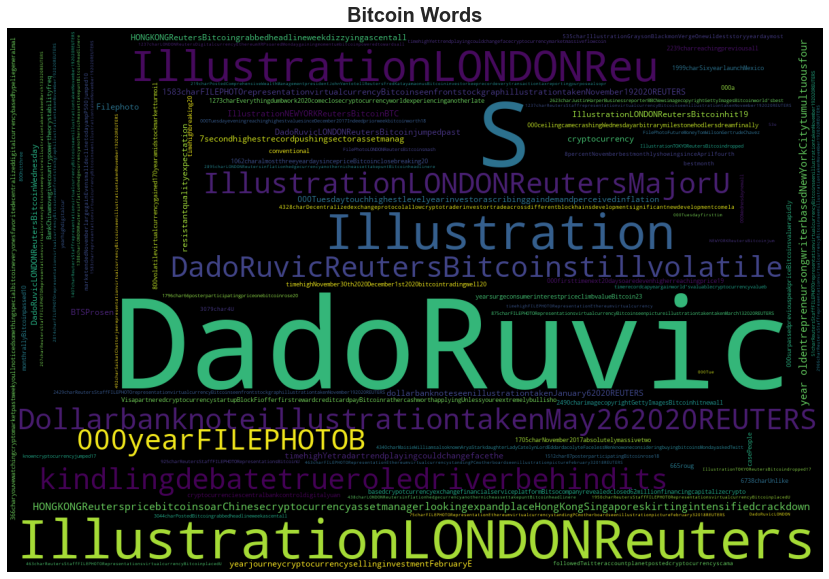

In [30]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=1200, height=800, max_words=100).generate("".join(ngrams_btc))
plt.imshow(wc)
plt.axis("off")
fontdict={"fontsize":20, "fontweight":"bold"}
plt.title("Bitcoin Words", fontdict=fontdict)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

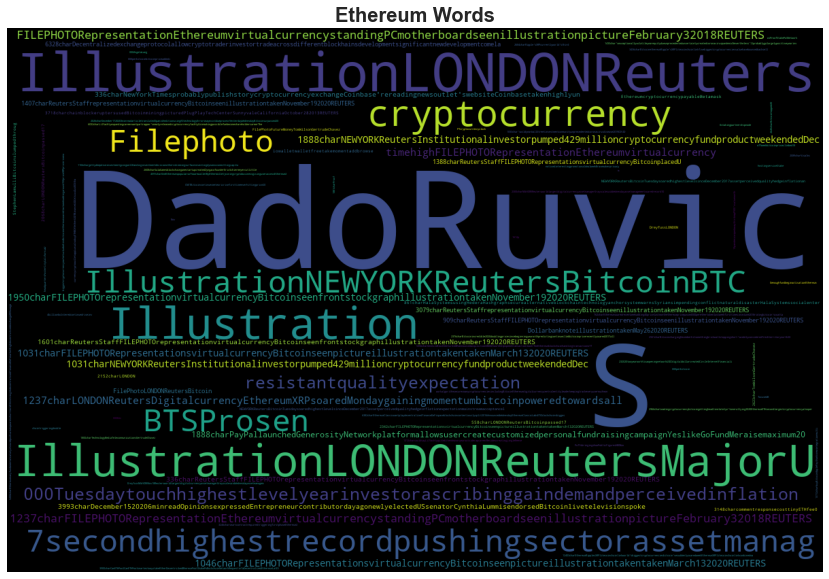

In [31]:
# Generate the Ethereum word cloud
wc = WordCloud(width=1200, height=800, max_words=100).generate("".join(ngrams_eth))
plt.imshow(wc)
plt.axis("off")
fontdict={"fontsize":20, "fontweight":"bold"}
plt.title("Ethereum Words", fontdict=fontdict)
plt.show

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [35]:
# Concatenate all of the bitcoin text together

article = bitcoin_news["articles"]
bitcoinn = " "
for i in bitcoin_news["articles"]:
    bitcoinn+=str(i)


In [36]:
# Run the NER processor on all of the text
doc = nlp(bitcoinn)

# Add a title to the document

doc.user_data["title"] = "Bitcoin NLP NER"

In [37]:
# Render the visualization
displacy.render(doc, style='ent')

In [38]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Lifehacker.com ORG
Mike Winters PERSON
Two Cents MONEY
Mike Winters PERSON
Lifehacker ORG
the New Visa Bitcoin Rewards Card ORG
first ORDINAL
Bitcoin GPE
2020-12-03T22:00:00Z' DATE
first ORDINAL
Bitcoin GPE
TechCrunch PERSON
Bitcoin GPE
20k MONEY
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
Bitcoin GPE
the past two months DATE
CoinMarket ORG
2020-12-16T17:12:40Z' DATE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
Gizmodo.com ORG
Rhett Jones' PERSON
Bitcoin Blows PERSON
20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
https://gizmodo.com/bitcoin-blows-past-20-000-milestone-1845894176 PRODUCT
2020-12-16T15:15:00Z' DATE
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
Alex Wilhelm' PERSON
https://techcrunch.com/wp-content/uploads/2020/05/NSussman_Techcrunch_Exchange_v3_GRY.jpg?w=533' WORK_OF_ART
2020-12-17T16:01:42Z' DATE
2020 DATE
late-year D

---

## Ethereum NER

In [39]:
# Concatenate all of the bitcoin text togethe
eth_article = ethereum_news["articles"]

ethereumc = " "
for e in ethereum_news["articles"]:
    ethereumc+=str(e)



In [40]:
# Run the NER processor on all of the text

doc = nlp(ethereumc)

# Add a title to the document
doc.user_data["title"] = "Ethereum NLP NER"

In [41]:
# Render the visualization
displacy.render(doc, style="ent")

In [42]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Reuters ORG
Tom Wilson' PERSON
Reuters ORG
XRP ORG
Monday DATE
2020-11-23T14:16:00Z' DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration\r\nLONDON ORG
Reuters ORG
Reuters ORG
Tom Wilson' PERSON
Reuters ORG
XRP ORG
Monday DATE
2020-11-23T14:16:00Z' DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration\r\nLONDON ORG
Reuters ORG
Reuters ORG
Tom Wilson' PERSON
Reuters India' ORG
XRP ORG
Monday DATE
2020-11-23T14:48:00Z' DATE
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-12-16T16:35:00Z' DATE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Reuters ORG
U.S. GPE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-12-16T16:46:00Z' DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Reuters ORG
U.S. GPE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
India GPE
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-1